In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from utils import load, plot_history, compose_alpha
from models import own_custom_conv_net, neuralmon_conv_net, smaller_VGGNet

In [2]:
def custom_CNN_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)),   
        
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(64, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 

        layers.Conv2D(128, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(150, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Flatten(), 
        layers.Dense(64, activation='relu'), 
        layers.Dense(18, activation='sigmoid'), 
    ])
    
    return model

In [3]:
train_dataset, val_dataset = load(csv="pokemon_image_dataset.csv", image_path="./images/pokemon_image_dataset")

In [4]:
histories = []

In [5]:
def compute_class_weights(dataset):
    # Initialize counters
    positive_counts = tf.zeros(18, dtype=tf.int32)
    total_samples = 0

    # Iterate over the dataset
    for _, labels in dataset:
        positive_counts += tf.reduce_sum(labels, axis=0)
        total_samples += tf.shape(labels)[0]

    # Convert to numpy for easier manipulation
    positive_counts = positive_counts.numpy()
    total_samples = total_samples.numpy()

    # Calculate class weights
    class_weights = {}
    for i in range(18):
        if positive_counts[i] > 0:
            class_weights[i] = (1 / positive_counts[i]) * (total_samples / 2.0)
        else:
            class_weights[i] = 1.0  # Assign a neutral weight if the class doesn't appear

    return class_weights

class_weights = compute_class_weights(train_dataset)
print(class_weights)

{0: 2.967889908256881, 1: 3.8058823529411763, 2: 3.993827160493827, 3: 4.256578947368421, 4: 5.134920634920634, 5: 5.303278688524591, 6: 6.47, 7: 6.10377358490566, 8: 5.7767857142857135, 9: 7.702380952380952, 10: 7.3522727272727275, 11: 8.513157894736842, 12: 8.743243243243244, 13: 9.803030303030303, 14: 8.294871794871794, 15: 8.0875, 16: 10.109375, 17: 12.442307692307693}


In [6]:
model_BCLoss = custom_CNN_model((120,120,4))

model_BCLoss.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history1 = model_BCLoss.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history1)

Epoch 1/35


c:\Uni\Enhancing-Pokemon-Type-Recognition-with-Hybrid-Datasets\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - AUC: 0.5149 - Precision: 0.0911 - Recall: 0.1464 - accuracy: 0.0783 - loss: 0.4744 - val_AUC: 0.6137 - val_Precision: 0.3636 - val_Recall: 0.0159 - val_accuracy: 0.1420 - val_loss: 0.5374
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - AUC: 0.6968 - Precision: 0.4283 - Recall: 0.0252 - accuracy: 0.2505 - loss: 0.2659 - val_AUC: 0.4959 - val_Precision: 0.0830 - val_Recall: 0.5020 - val_accuracy: 0.0247 - val_loss: 0.7082
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - AUC: 0.7760 - Precision: 0.6091 - Recall: 0.0508 - accuracy: 0.3185 - loss: 0.2456 - val_AUC: 0.4987 - val_Precision: 0.0830 - val_Recall: 0.5246 - val_accuracy: 0.0370 - val_loss: 0.7639
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - AUC: 0.8523 - Precision: 0.7664 - Recall: 0.0957 - accuracy: 0.4207 - loss: 0.2174 - val_AUC: 0.4896 - val_Precision: 0.0861 - val_Recall: 0.5885 - val_accuracy: 0.0432 - val_loss: 0.8030
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11

In [7]:
model_BCLoss_weighted = custom_CNN_model((120,120,4))

model_BCLoss_weighted.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history2 = model_BCLoss_weighted.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1,
    class_weight=class_weights
)
histories.append(history2)

Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - AUC: 0.5307 - Precision: 0.0992 - Recall: 0.2096 - accuracy: 0.1008 - loss: 2.7022 - val_AUC: 0.4093 - val_Precision: 0.0649 - val_Recall: 0.1560 - val_accuracy: 0.0370 - val_loss: 0.6369
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - AUC: 0.6809 - Precision: 0.4503 - Recall: 0.0140 - accuracy: 0.1856 - loss: 1.3999 - val_AUC: 0.4892 - val_Precision: 0.0747 - val_Recall: 0.2314 - val_accuracy: 0.0309 - val_loss: 0.5981
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - AUC: 0.7695 - Precision: 0.7270 - Recall: 0.0348 - accuracy: 0.3033 - loss: 1.2496 - val_AUC: 0.4740 - val_Precision: 0.0734 - val_Recall: 0.2305 - val_accuracy: 0.0556 - val_loss: 0.5854
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - AUC: 0.8395 - Precision: 0.9251 - Recall: 0.0699 - accuracy: 0.4193 - loss: 1.1100 - val_AUC: 0.4711 - val_Precision: 0.0627 - val_Recall: 0.2143 - val_accuracy: 0.0370 - val_loss: 0.5956
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━

In [8]:
model_BCFLoss = custom_CNN_model((120,120,4))

model_BCFLoss.compile(optimizer='adam',
            loss='binary_focal_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history3 = model_BCFLoss.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history3)

Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - AUC: 0.5081 - Precision: 0.0819 - Recall: 0.2155 - accuracy: 0.0579 - loss: 0.2693 - val_AUC: 0.5192 - val_Precision: 0.0923 - val_Recall: 0.4553 - val_accuracy: 0.0247 - val_loss: 0.1838
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - AUC: 0.6716 - Precision: 0.3472 - Recall: 0.0573 - accuracy: 0.1930 - loss: 0.0796 - val_AUC: 0.5040 - val_Precision: 0.0836 - val_Recall: 0.4877 - val_accuracy: 0.0123 - val_loss: 0.4284
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - AUC: 0.7759 - Precision: 0.5093 - Recall: 0.0473 - accuracy: 0.3225 - loss: 0.0671 - val_AUC: 0.4928 - val_Precision: 0.0873 - val_Recall: 0.5060 - val_accuracy: 0.0247 - val_loss: 0.6538
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - AUC: 0.8320 - Precision: 0.7416 - Recall: 0.1070 - accuracy: 0.3698 - loss: 0.0600 - val_AUC: 0.5279 - val_Precision: 0.0912 - val_Recall: 0.5560 - val_accuracy: 0.0247 - val_loss: 0.7717
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━

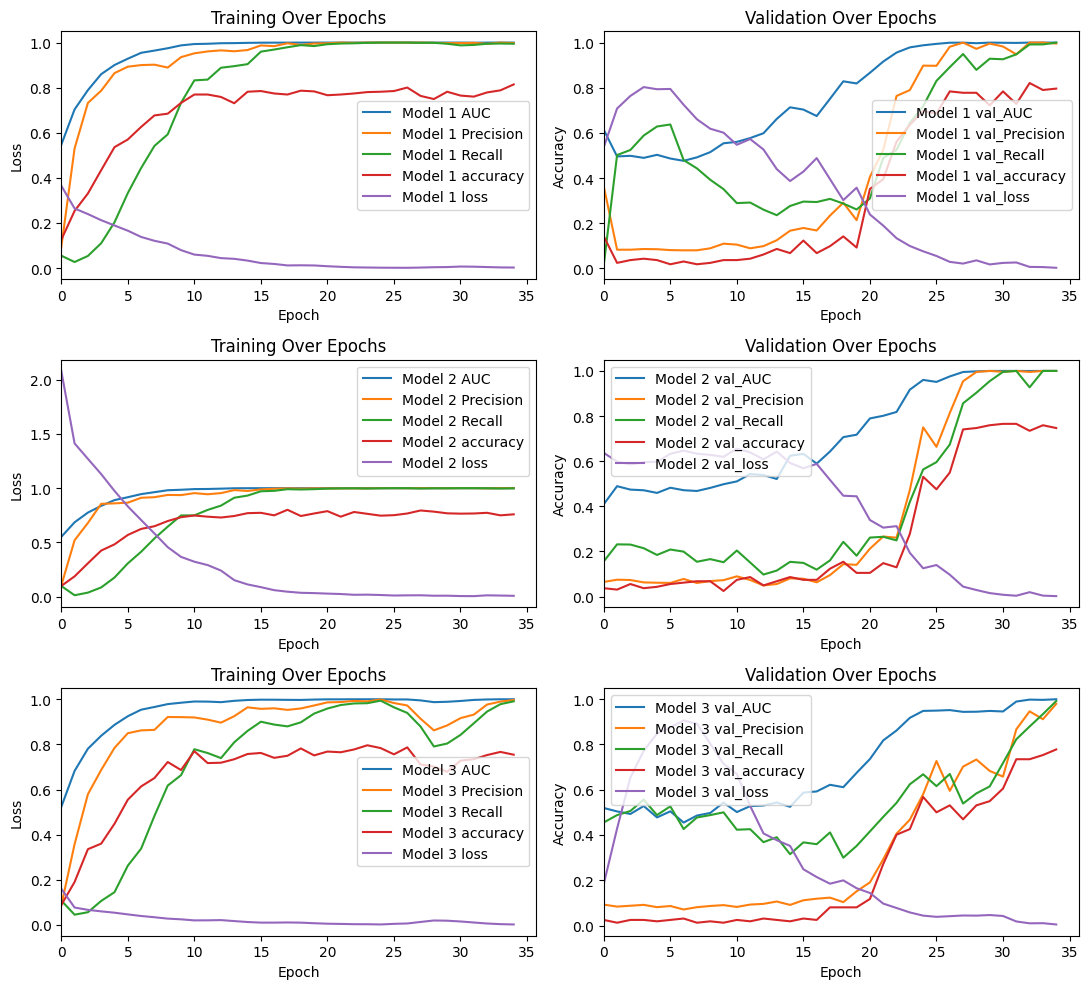

In [16]:
def plot_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, axs = plt.subplots(len(histories), 2, figsize=(11, 10))

    for i, (history, (ax1, ax2)) in enumerate(zip(histories,axs)):
        # Iterate over each history and label to plot on the same figure
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

        # Customize loss subplot
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Training Over Epochs')
        ax1.legend()
        ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

        # Customize accuracy subplot
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.set_title('Validation Over Epochs')
        ax2.legend()
        ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
plot_history(histories)

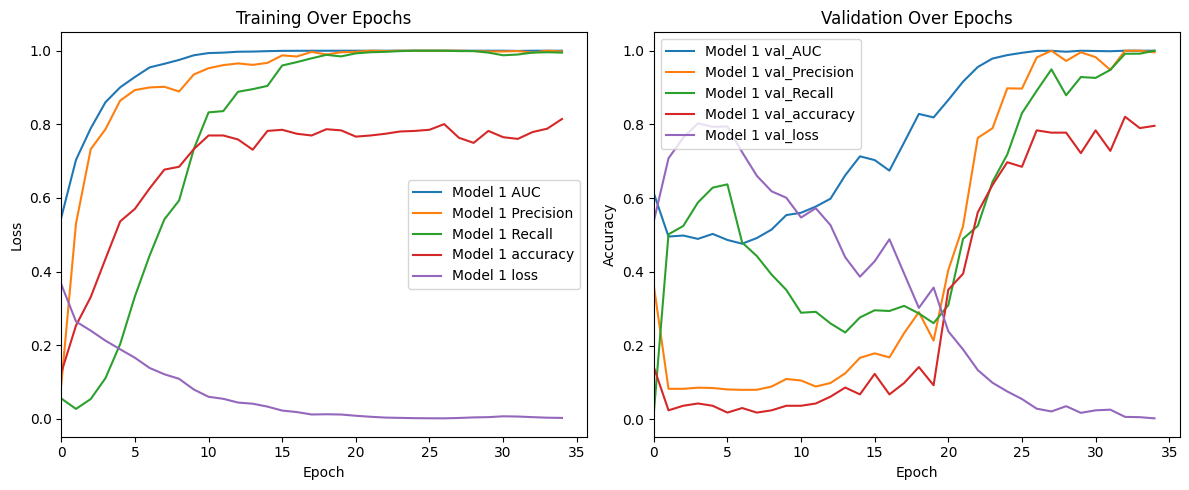

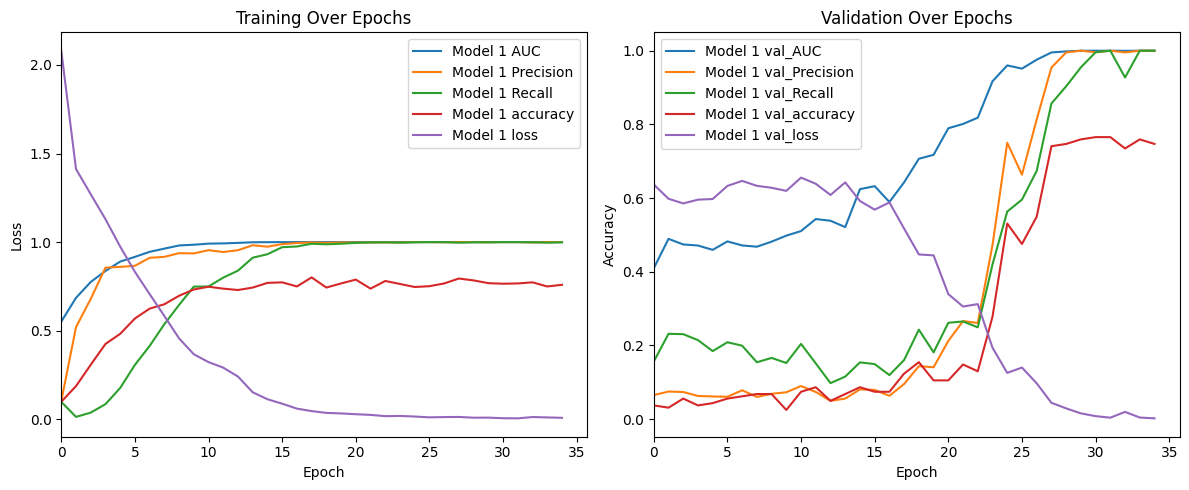

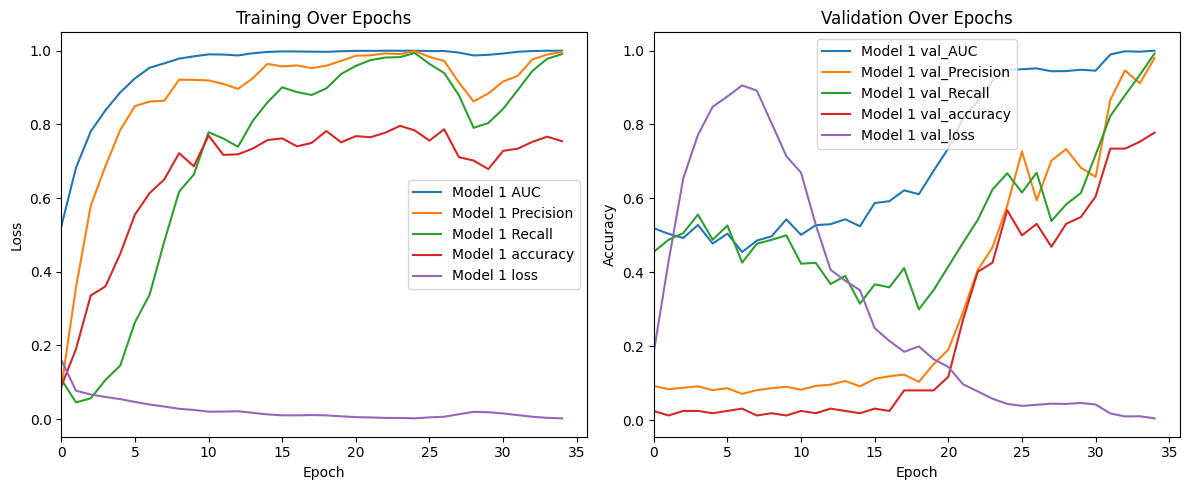

In [13]:
def plot_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Iterate over each history and label to plot on the same figure
    for i, history in enumerate(histories):
        
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

    # Customize loss subplot
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Over Epochs')
    ax1.legend()
    ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Customize accuracy subplot
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Validation Over Epochs')
    ax2.legend()
    ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
for history in histories:
    plot_history([history])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
tf.Tensor([0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(18,), dtype=int32)
[0.    0.999 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.001 0.02  0.    0.    0.   ]
(120, 120, 3)


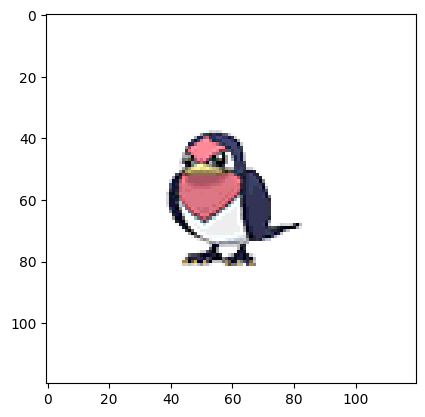

In [147]:
for sample in val_dataset:
    pred = model_BCLoss.predict(sample[0])
    print(sample[1][0])
    print(np.around(pred[0], decimals=3))
    img = compose_alpha(sample[0][0].numpy()*255)
    print(img.shape)
    plt.imshow(img, interpolation='nearest')
    plt.show()
    break